<a href="https://colab.research.google.com/github/USE-Computer-Science/lectures/blob/main/final%20countdown/%D0%95%D0%93%D0%AD23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**8.** Все шестибуквенные слова из букв М,А,Н,Г,У,С,Т записаны в алфавитном порядке и пронумерованы.

1. АААААА
2. АААААГ
3. АААААМ
4. АААААН
5. АААААС
6. АААААТ
7. АААААУ
8. ...

Под каким номером в списке стоит последнее слово, которое не начинается с буквы У, содержит только две буквы М и не более одной буквы Г?

**Ответ:** 705862

In [2]:
# АГМНСТУ
# 0123456

# ТУУУУММ
# 5666622

int('5666622', 7) + 1

705862

In [3]:
last = index = 0
for b1 in 'АГМНСТУ':
  for b2 in 'АГМНСТУ':
    for b3 in 'АГМНСТУ':
      for b4 in 'АГМНСТУ':
        for b5 in 'АГМНСТУ':
          for b6 in 'АГМНСТУ':
            for b7 in 'АГМНСТУ':
              index += 1
              word = b1+b2+b3+b4+b5+b6+b7
              if word[0] != 'У' and word.count('М') == 2 and word.count('Г') <= 1:
                last = index
print(last)

705862


**9.** Откройте [файл](https://github.com/USE-Computer-Science/lectures/raw/main/final%20countdown/files/9.txt), содержащий в каждой строке семь натуральных чисел. Определите количество строк таблицы, для которых выполнены все три условия:

1. В строке есть одно число, которое повторяется трижды;
2. 4 оставшихся числа различны;
3. Среднее арифметическое неповторяющихся чисел не больше повторяющегося числа.


**Ответ:** 36

In [4]:
f = open('9.txt')
cnt = 0

for s in f:
  row = [int(x) for x in s.split()]
  if len(row) != len(set(row)) + 2:
    continue
  triple = 0
  for r in row:
    if row.count(r) == 3:
      triple = r
      break

  if triple and (sum(row) - triple*3)/4 <= triple:
    cnt += 1

print(cnt)

36


**24.** Текстовый [файл](https://github.com/USE-Computer-Science/lectures/raw/main/final%20countdown/files/24.txt) состоит из символов *T, U, V, W, X, Y, Z.*

1) Определите в прилагаемом файле максимальное количество идущих подряд символов (длину непрерывной подпоследовательности), среди которых символ Y встречается более 150 раз.

2) Определите в прилагаемом файле минимальное количество идущих подряд символов (длину непрерывной подпоследовательности), среди которых символ Y встречается не менее 150 раз.

**Ответ:** 244 164

In [9]:
s = open('24.txt').readline()
# разобъём строку на подстроки между игреками
s = s.split('Y')
# максимальная длина последовательности
mx = 0

# __Y__ - вокруг одного Y - 2 подстроки
# __Y__Y__ - вокруг двух Y - 3 подстроки
# значит вокруг 150 Y будет 151 подстрока
for i in range(len(s) - 151):
  # склеим строку из 151 подстроки и 150 Y
  substr = 'Y'.join(s[i:i+151])
  # обновим максимальную найденную длину подстроки
  mx = max(mx, len(substr))

print(mx)

244


In [10]:
s = open('24.txt').readline()
s = s.split('Y')
mn = float('inf')

# Y__Y - внутри двух Y - 1 подстрока
# Y__Y__Y - внутри трёх Y - 2 подстроки
# значит внутри 150 Y будет 149 подстрок

# __Y... если строка начинается не с Y - нулевой элемент списка рассматривать нельзя
start = 0 if s[0] == 'Y' else 1
# ...Y__ если строка заканчивается не Y - последний элемент списка рассматривать нельзя
stop = len(s) - 149 if s[-1] == 'Y' else len(s) - 150

for i in range(start, stop):
  substr = 'Y'.join(s[i:i+149])
  mn = min(mn, len(substr))

print(mn)

164


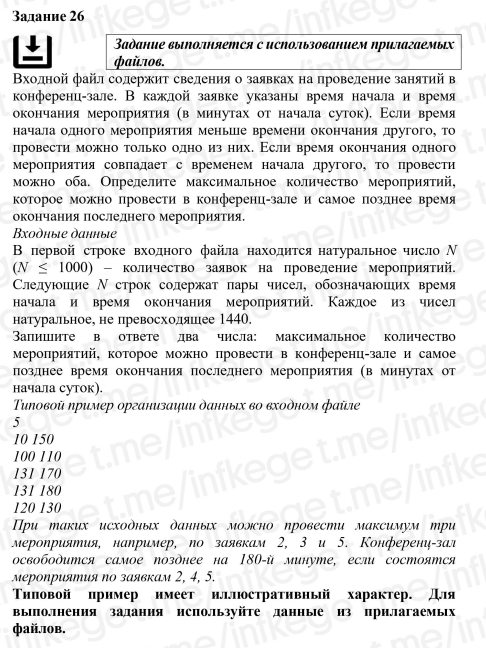

[Файл к заданию](https://raw.githubusercontent.com/USE-Computer-Science/lectures/main/final%20countdown/files/26.txt)

**Ответ:** **16** 1345

In [5]:
f = open('26.txt')
n = int(f.readline())

apps = []
for i in range(n):
  apps += [list(map(int,f.readline().split()))]

# упорядочиваем список по возрастанию времени завершения мероприятий
apps = sorted(apps, key = lambda x: x[1]) # полностью рабочая идея

# время завершения мероприятия в зале
hall = [0]

# функция бронирования зала
def put(app):
  # если время проведения предыдущего мероприятия в зале вышло
  if hall[0] <= app[0]:
      # бронируем зал для следующего мероприятия
      hall[0] = app[1]
      # возвращаем длительность последнего мероприятия
      return app[1] - app[0]
  # если зал занят
  return 0


# суммарное количество проведённых мероприятий
cnt = 0
# длительность последнего мероприятия
last_dur = 0

# обходим список заявок
for app in apps:
  # пробуем забронировать зал
  dur = put(app)
  # если зал удалось забронировать
  if dur:
    # увеличиваем счётчик проведённых мероприятий
    cnt += 1
    # запоминаем длительность последнего мероприятия
    last_dur = dur

# находим максимальное из времён завершений всех мероприятий, которые можно начать позже, чем сейчас начинается последнее мероприятие
mx = max([x[1] for x in apps if x[0] >= hall[0] - last_dur])

# кажется, что это правильный ответ, и с 16 оно так и есть
print(cnt, mx)
# Но на самом деле область поиска шире. И искать надо не с времени начала последнего, а с времени завершения предпоследнего мероприятия

16 1028


In [6]:
f = open('26.txt')
n = int(f.readline())

apps = []
for i in range(n):
  apps += [list(map(int,f.readline().split()))]
# упорядочиваем список по возрастанию времени завершения мероприятий
apps = sorted(apps, key = lambda x: x[1]) # полностью рабочая идея

# время завершения мероприятия в зале
hall = 0

# суммарное количество проведённых мероприятий
cnt = 0
# время завершения предпоследнего мероприятия
pnl = 0

# обходим список заявок
for app in apps:
  # если предыдущее мероприятие завершилось не позднее начала текущего
  if hall <= app[0]:
    # запоминаем время завершения предпоследнего мероприятия
    pnl = hall
    # бронируем зал для текущего мероприятия
    hall = app[1]
    # увеличиваем счётчик проведённых мероприятий
    cnt += 1

# находим максимальное из времён завершений всех мероприятий, которые можно начать после завершения предпоследнего мероприятия
mx = max([x[1] for x in apps if x[0] >= pnl])
print(cnt, mx)

16 1345


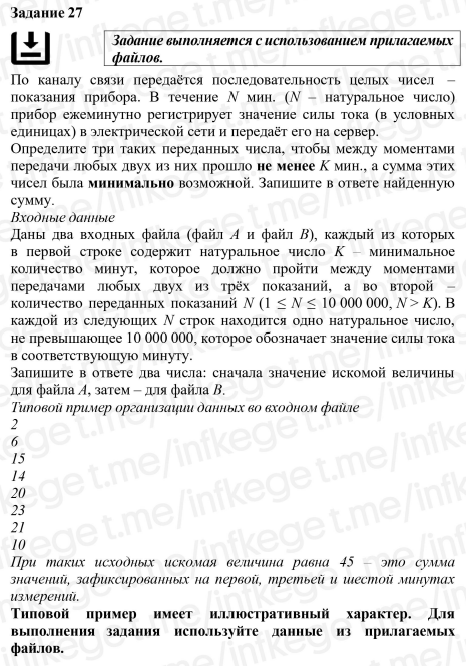

[Файл А](https://github.com/USE-Computer-Science/lectures/raw/main/final%20countdown/files/27_A.txt), [Файл Б](https://github.com/USE-Computer-Science/lectures/raw/main/final%20countdown/files/27_B.txt)

**Ответ:** 166998 15102

In [7]:
f = open('27_A.txt')
k = int(f.readline())
n = int(f.readline())

mn = float('inf')
nums = [int(x) for x in f]

for i in range(n):
  for j in range(i+k, n):
    for m in range(j+k, n):
      mn = min(mn, nums[i]+nums[j]+nums[m])

print(mn)

166998


In [8]:
f = open('27_A.txt')
k = int(f.readline())
n = int(f.readline())

mn = float('inf')
nums = [int(x) for x in f]

m1 = float('inf')
m2 = float('inf')

for i in range(2*k, n):
  m1 = min(m1, nums[i-2*k])
  m2 = min(m2, m1 + nums[i-k])
  mn = min(mn, m2 + nums[i])

print(mn)

166998
